<a href="https://colab.research.google.com/github/nahin333/DL-practice-codes/blob/main/mnist_ipby.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
len(X_test)

10000

In [ ]:
len(X_train)

60000

In [ ]:
X_train.shape

(60000, 28, 28)

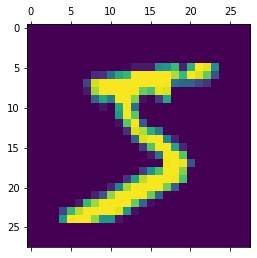

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model = keras.Sequential([
   keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')
])

model.compile(
   optimizer = 'adam',
   loss = 'sparse_categorical_crossentropy',
   metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4692 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2662 - accuracy: 0.9255


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2690 - accuracy: 0.9247


[0.2689744532108307, 0.9247000217437744]

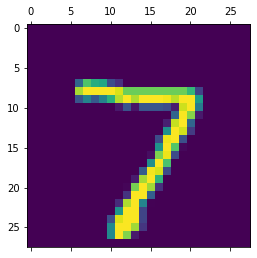

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.24707425e-02, 1.71061856e-07, 5.39522171e-02, 9.57543492e-01,
       1.52847171e-03, 1.25679523e-01, 1.25087877e-06, 9.99830484e-01,
       1.06227994e-01, 6.54093802e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    3,    2,    2,    0],
       [   0, 1108,    3,    2,    0,    2,    4,    2,   14,    0],
       [   6,    6,  918,   18,    6,    6,   10,   12,   46,    4],
       [   4,    0,   17,  905,    0,   34,    2,   12,   28,    8],
       [   2,    1,    4,    2,  900,    0,    9,    5,   11,   48],
       [   9,    1,    5,   24,    6,  795,    9,    5,   31,    7],
       [  12,    3,    8,    1,    8,   22,  898,    2,    4,    0],
       [   1,    5,   20,    4,    4,    1,    0,  957,    5,   31],
       [   7,    6,    6,   15,    9,   28,    7,   12,  879,    5],
       [  10,    6,    1,    9,   21,    8,    0,   21,   11,  922]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

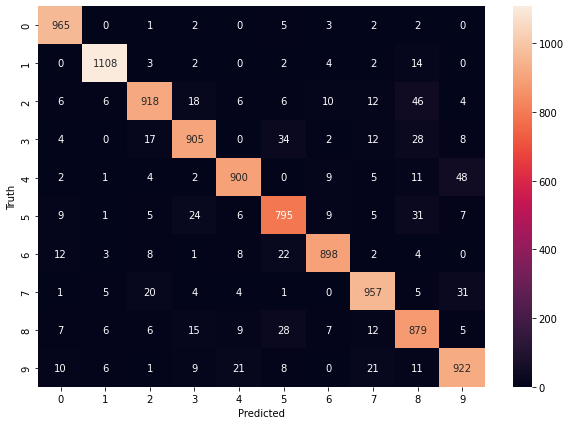

In [ ]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
   keras.layers.Flatten(input_shape =(28, 28)),
   keras.layers.Dense(100, activation='relu'),
   keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
   optimizer = 'adam',
   loss = 'sparse_categorical_crossentropy',
   metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2718 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1256 - accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9729
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0538 - accuracy: 0.9830


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9771


[0.07577924430370331, 0.9771000146865845]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

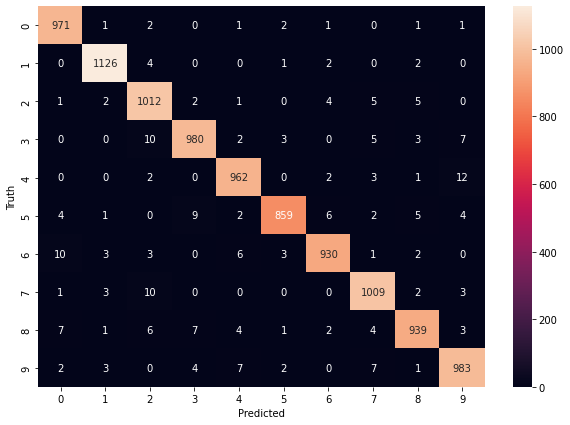

In [ ]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')